## Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#plt.rcParams["figure.figsize"]=[6,4]
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project_data/NCKU_DSAI/HW1/export.csv',encoding='utf-8')
df

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),備轉容量率(%),工業用電(百萬度),民生用電(百萬度),核一#1(萬瓩),核一#2(萬瓩),核二#1(萬瓩),核二#2(萬瓩),核三#1,核三#2,林口#1,林口#2,林口#3,台中#1,台中#2,台中#3,台中#4,台中#5,台中#6,台中#7,台中#8,台中#9,台中#10,興達#1,興達#2,興達#3,興達#4,大林#1,大林#2,和平#1,和平#2,麥寮#1,麥寮#2,麥寮#3,汽電共生,大潭 (#1-#6),通霄 (#1-#6),興達 (#1-#5),南部 (#1-#4),大林(#5-#6),海湖 (#1-#2),國光 #1,新桃#1,星彰#1,星元#1,嘉惠#1,豐德(#1-#2),協和 (#1-#4),氣渦輪,離島,德基,青山,谷關,天輪,馬鞍,萬大,大觀,鉅工,大觀二,明潭,碧海,立霧,龍澗,卓蘭,水里,其他小水力,風力發電,太陽能發電
0,20190101,26429,23872,2557.0,10.71,279.870,192.192,0,0,98.4,98.3,94.3,0.0,76.0,76.1,NaN,52.5,0.0,0.0,52.1,52.5,52.2,51.9,0.0,47.3,0.0,28.1,28.1,38.4,52.5,75.6,76.4,56.3,56.5,56.8,0.0,52.3,39.7,217.2,128.8,79.9,104.9,74.9,45.9,0.0,0.0,53.7,56.9,0.0,105.0,13.3,0.0,10.9,0.0,2.7,2.5,2.2,1.2,0.9,0.0,0.1,16.0,54.0,0.0,1.2,3.0,2.2,0.0,24.3,50.9,0.0
1,20190102,30047,28148,1899.0,6.75,323.080,221.864,0,0,98.5,98.6,94.3,0.0,76.0,76.0,NaN,53.3,0.0,0.0,52.1,52.7,52.3,51.9,0.0,0.0,0.0,33.1,33.0,42.2,52.6,75.6,76.4,60.0,60.3,56.8,0.0,57.1,104.4,243.0,135.8,151.1,101.9,91.7,92.0,49.5,60.1,53.3,56.5,66.5,102.4,41.1,0.0,11.0,3.4,3.2,2.5,2.2,1.2,1.0,0.0,0.0,29.9,52.3,0.0,1.2,2.0,2.1,0.0,23.4,37.9,0.0
2,20190103,30343,28452,1891.0,6.65,336.597,231.146,0,0,98.7,98.6,94.1,0.0,75.9,75.9,NaN,53.3,0.0,0.0,52.0,52.7,52.2,51.9,0.0,0.0,0.0,28.2,28.1,37.8,52.6,75.8,76.4,59.9,49.3,56.8,0.0,57.1,104.0,261.6,129.0,147.5,93.8,91.6,92.0,49.2,60.2,53.4,56.3,66.5,104.0,86.9,0.0,10.9,3.1,1.4,2.5,2.2,1.1,2.4,1.9,0.5,14.3,65.5,0.0,1.4,1.2,2.0,0.1,24.1,41.6,0.0
3,20190104,30301,28490,1811.0,6.36,339.020,232.810,0,0,98.7,98.4,94.1,0.0,76.0,76.0,NaN,53.2,0.0,0.0,52.3,52.8,52.2,51.9,0.0,0.0,0.0,32.7,33.1,38.4,52.6,75.6,76.4,60.2,0.0,56.8,0.0,57.1,106.9,315.1,147.8,160.6,87.6,91.6,92.0,49.0,60.2,53.6,56.6,66.6,103.1,75.2,0.0,11.4,3.9,3.7,2.5,2.2,1.2,1.0,3.4,1.0,18.1,52.3,0.0,1.4,1.4,0.0,0.0,19.3,12.4,11.0
4,20190105,27957,26054,1903.0,7.30,315.825,216.882,0,0,98.7,98.6,94.1,0.0,75.7,75.8,NaN,53.1,0.0,0.0,52.2,52.9,52.2,51.8,28.1,0.0,0.0,28.2,28.1,32.8,52.7,75.8,76.5,57.5,0.0,56.8,0.0,57.1,40.6,264.4,146.4,161.3,106.2,88.7,46.1,0.0,60.1,53.2,55.8,68.6,102.3,13.1,0.0,11.3,0.3,1.2,2.2,1.8,0.8,0.9,1.8,0.7,30.4,57.6,0.0,1.3,3.0,2.9,0.0,23.9,18.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,20201027,35071,31669,3402.0,10.74,362.462,309.405,0,0,98.1,89.9,94.4,94.2,75.8,76.0,75.9,40.0,0.0,0.0,39.9,38.0,43.9,0.0,0.0,40.5,41.0,0.0,23.0,0.0,28.5,76.0,76.1,60.4,60.3,41.0,40.9,57.4,71.6,375.1,277.9,165.6,113.4,98.4,91.8,47.3,62.9,50.4,51.6,68.9,97.6,13.5,0.0,11.4,2.5,5.3,3.8,3.7,0.0,1.0,1.0,0.1,43.5,63.8,4.8,1.4,1.9,1.7,0.8,13.9,34.6,41.5
666,20201028,35429,31959,3470.0,10.86,365.469,311.972,0,0,98.0,98.2,94.6,94.3,75.9,76.0,76.0,37.6,0.0,0.0,33.0,34.1,33.1,0.0,0.0,43.6,33.3,0.0,22.2,0.0,25.8,75.9,76.1,60.2,60.3,37.5,37.4,57.4,70.1,383.7,275.8,150.7,101.5,72.3,92.0,46.9,64.9,50.4,51.5,68.9,96.2,39.1,0.0,12.1,0.0,2.7,3.9,3.8,0.0,0.9,1.9,0.8,14.4,48.0,4.0,1.2,1.4,0.0,0.5,13.7,58.8,161.6
667,20201029,34978,31271,3707.0,11.86,362.440,309.387,0,0,97.8,98.0,94.6,94.3,76.0,76.1,76.2,37.5,0.0,0.0,32.8,34.0,33.0,0.0,0.0,43.4,33.4,0.0,23.1,0.0,25.7,75.7,76.2,60.3,60.2,37.8,37.4,57.3,79.3,352.6,278.4,163.6,103.3,43.2,92.0,47.9,60.0,50.5,51.4,66.4,96.7,13.5,0.0,12.3,3.3,6.4,4.3,4.1,0.0,0.9,0.8,0.2,20.5,50.0,1.0,1.2,1.3,0.0,0.5,16.2,60.8,143.3
668,20201030,34479,30264,4215.0,13.93,351.492,300.041,0,0,97.8,98.0,94.5,94.3,76.0,76.2,76.1,37.6,0.0,0.0,32.9,34.1,33.0,0.0,0.0,32.7,33.5,0.0,23.2,0.0,25.8,76.0,76.2,60.2,60.2,56.8,56.7,57.4,76.3,305.4,282.1,159.1,104.3,35.7,39.4,39.1,59.9,45.0,45.4,66.3,44.5,13.4,0.0,12.3,3.8,7.6,4.3,4.1,0.0,0.9,1.3,0.2,12.1,32.3,2.0,1.2,1.5,0.0,0.5,16.5,60.1,207.5


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Project_data/NCKU_DSAI/HW1/export2.csv',encoding='utf-8')
df2

,日期,備轉容量(萬瓩),備轉容量率(%)
0,2014/01/01,433.4,18.86
1,2014/01/02,411.9,15.82
2,2014/01/03,359.3,13.56
3,2014/01/04,418.5,17.07
4,2014/01/05,441.5,19.20
...,...,...,...
2183,2019/12/27,320.6,11.50
2184,2019/12/28,315.2,12.43
2185,2019/12/29,289.9,11.60
2186,2019/12/30,314.3,11.23


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Project_data/NCKU_DSAI/HW1/export3.csv',encoding='utf-8')
df3

,日期,備轉容量(萬瓩),備轉容量率(%)
0,2020/01/01,279.0,11.01
1,2020/01/02,308.0,10.91
2,2020/01/03,338.3,11.96
3,2020/01/04,363.6,14.21
4,2020/01/05,269.5,10.88
...,...,...,...
345,2020/12/11,312.9,10.46
346,2020/12/12,328.2,12.31
347,2020/12/13,283.0,11.12
348,2020/12/14,302.1,10.20


In [ ]:
df4 = pd.concat([df2, df3],ignore_index=True)
df4

,日期,備轉容量(萬瓩),備轉容量率(%)
0,2014/01/01,433.4,18.86
1,2014/01/02,411.9,15.82
2,2014/01/03,359.3,13.56
3,2014/01/04,418.5,17.07
4,2014/01/05,441.5,19.20
...,...,...,...
2533,2020/12/11,312.9,10.46
2534,2020/12/12,328.2,12.31
2535,2020/12/13,283.0,11.12
2536,2020/12/14,302.1,10.20


In [ ]:
df4['備轉容量(萬瓩)'] *= 10
df4 = df4.rename(columns={"備轉容量(萬瓩)":"備轉容量(MW)"})

In [ ]:
df4

,日期,備轉容量(MW),備轉容量率(%)
0,2014/01/01,4334.0,18.86
1,2014/01/02,4119.0,15.82
2,2014/01/03,3593.0,13.56
3,2014/01/04,4185.0,17.07
4,2014/01/05,4415.0,19.20
...,...,...,...
2533,2020/12/11,3129.0,10.46
2534,2020/12/12,3282.0,12.31
2535,2020/12/13,2830.0,11.12
2536,2020/12/14,3021.0,10.20


In [ ]:
data = df4['備轉容量(MW)']
data

0       4334.0
1       4119.0
2       3593.0
3       4185.0
4       4415.0
         ...  
2533    3129.0
2534    3282.0
2535    2830.0
2536    3021.0
2537    3012.0
Name: 備轉容量(MW), Length: 2538, dtype: float64

In [ ]:
# check if nan exist
data.isna().sum()

0

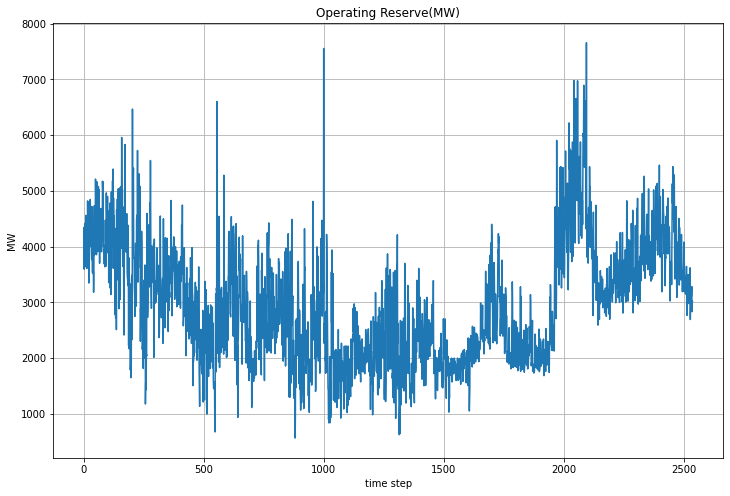

In [ ]:
plt.title('Operating Reserve(MW)')
plt.plot(data)
plt.xlabel('time step')
plt.ylabel('MW')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.1, random_state=0, shuffle=False)
print('training samples:',len(X_train))
print('validation samples:',len(X_test))

training samples: 2284
validation samples: 254


In [ ]:
X_train

0       4334.0
1       4119.0
2       3593.0
3       4185.0
4       4415.0
         ...  
2279    4095.0
2280    4108.0
2281    3749.0
2282    4414.0
2283    4249.0
Name: 備轉容量(MW), Length: 2284, dtype: float64

### normaliation features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train.values.reshape(-1,1))
y_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
X_test_scaled = scaler.fit_transform(X_test.values.reshape(-1,1))
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))
X_scaled

array([[0.53150994],
       [0.50119836],
       [0.42704074],
       ...,
       [0.44903426],
       [0.54278866],
       [0.51952629]])

In [ ]:
# split a multivariate sequence into samples
def split_sequences(df_x, df_y, n_steps):
    X, y = list(), list()
    for i in range(len(df_x)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(df_x)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = df_x[i:end_ix,:], df_y[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

train_window = 1
X_train_split, y_train_split = split_sequences(X_scaled, y_scaled, train_window)
#X_test_split, y_test_split = split_sequences(X_test.values, y_test.values, train_window)
print('split x:',len(X_train_split))

split x: 2283


In [ ]:
X_train_split[:2]

array([[[0.53150994]],

       [[0.50119836]]])

In [ ]:
y_train_split[:2]

array([[0.50119836],
       [0.42704074]])

## pytorch

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
torch.manual_seed(0)

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible')
  print('Working on ',torch.cuda.get_device_name())
else:
  device = torch.device('cpu')
  print('GPU is not avalible')

GPU is avalible
Working on  Tesla K80


In [ ]:
class Data(Dataset):
    # Constructor
    def __init__(self, X, y):
        self.x = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).unsqueeze(1).float()
        self.len = len(X)
            
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
        
train_data = Data(X_train_split, y_train_split)

In [ ]:
class LSTM(nn.Module):
    def __init__(self ,input_size, hidden_size, num_layers, batchsize, device, out_dim):
        super(LSTM, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size = self.input_size, 
                        hidden_size = self.hidden_size,
                        num_layers = self.num_layers, 
                        batch_first = True)

        self.fc = nn.Linear(self.hidden_size, out_dim)
        
        self.hidden_cell = (torch.zeros(self.num_layers,batchsize,self.hidden_size).to(device),
                    torch.zeros(self.num_layers,batchsize,self.hidden_size).to(device))
    
    def forward(self, x):

        output, self.hidden_cell = self.lstm(x, self.hidden_cell)   

        x = self.fc(output)

        x = x[:,-1,:]

        x = x.unsqueeze(1)

        return x

In [ ]:
def train(model, train_loader, optimizer, criterion, epochs=20):
    train_cost = []
    clipping_value = 5
    for epoch in tqdm(range(epochs)):
        #training===========================================
        model.train() # Switch to train mode
        correct = 0
        training_loss=[]
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            #print('bs:',len(x))
            model.hidden_cell = (torch.zeros(model.num_layers, len(x), model.hidden_size).to(device),
                        torch.zeros(model.num_layers, len(x), model.hidden_size).to(device))
            z = model(x)
            loss = criterion(z, y)
            loss.backward(retain_graph=True)
            torch.nn.utils.clip_grad_norm_(model.parameters(), clipping_value)
            optimizer.step()
            training_loss.append(loss.data.item())  
        train_cost.append(np.mean(training_loss))
        scheduler.step(np.mean(training_loss))
    # print('y',y)
    # print('z',z)

    return train_cost

In [ ]:
batch_size = 16
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

model = LSTM(input_size=1, hidden_size=100, num_layers=2, batchsize=batch_size, device=device, out_dim=1)
model.to(device)

#criterion = torch.nn.MSELoss()
criterion = torch.nn.L1Loss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.6)

In [ ]:
model

LSTM(
  (lstm): LSTM(1, 100, num_layers=2, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
# for x, y in train_loader:
#     x, y = x.to(device), y.to(device)
#     optimizer.zero_grad()
#     model.hidden_cell = (torch.zeros(model.num_layers, len(x), model.hidden_size).to(device),
#             torch.zeros(model.num_layers, len(x), model.hidden_size).to(device))
#     z = model(x)
#     print('='*10)
#     print('x',x.shape)
#     print('y',y.shape)
#     print('z',z.shape)
#     break

In [ ]:
train_cost = train(model=model, train_loader=train_loader, optimizer=optimizer, criterion=criterion,epochs=100)

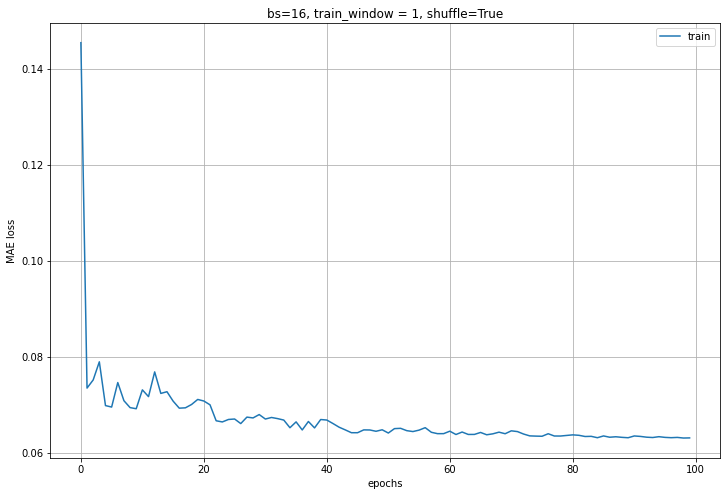

In [ ]:
plt.plot(train_cost, label = 'train')
plt.ylabel('MAE loss')
plt.xlabel('epochs')
#axes = plt.gca()
#axes.set_ylim([0,1])
plt.legend()
plt.title('bs=16, train_window = 1, shuffle=True')
plt.grid()
plt.show()

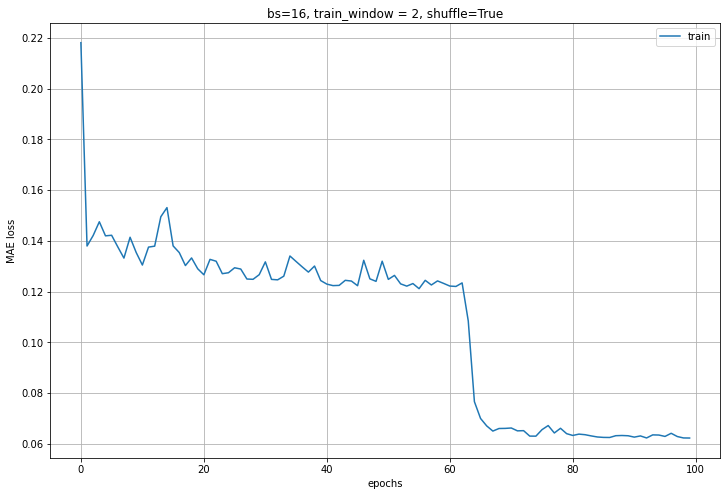

In [ ]:
plt.plot(train_cost, label = 'train')
plt.ylabel('MAE loss')
plt.xlabel('epochs')
#axes = plt.gca()
#axes.set_ylim([0,1])
plt.legend()
plt.title('bs=16, train_window = 2, shuffle=True')
plt.grid()
plt.show()

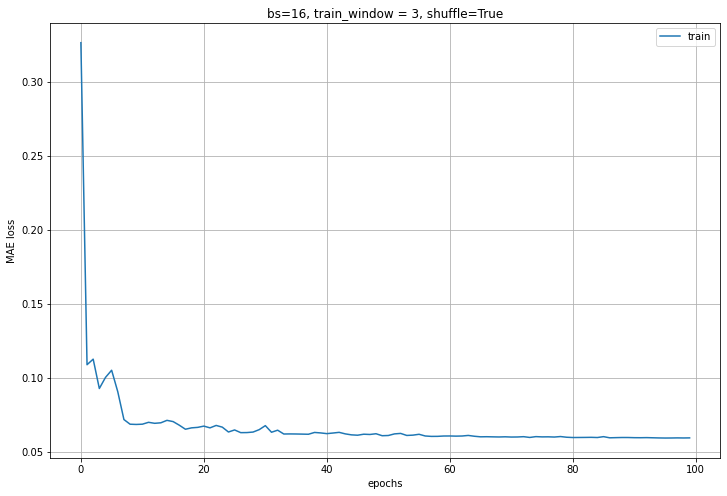

In [ ]:
plt.plot(train_cost, label = 'train')
plt.ylabel('MAE loss')
plt.xlabel('epochs')
#axes = plt.gca()
#axes.set_ylim([0,1])
plt.legend()
plt.title('bs=16, train_window = 3, shuffle=True')
plt.grid()
plt.show()

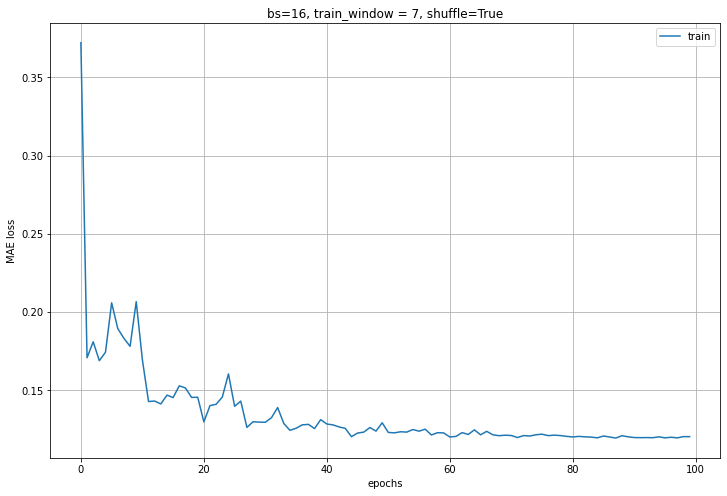

In [ ]:
plt.plot(train_cost, label = 'train')
plt.ylabel('MAE loss')
plt.xlabel('epochs')
#axes = plt.gca()
#axes.set_ylim([0,1])
plt.legend()
plt.title('bs=16, train_window = 7, shuffle=True')
plt.grid()
plt.show()

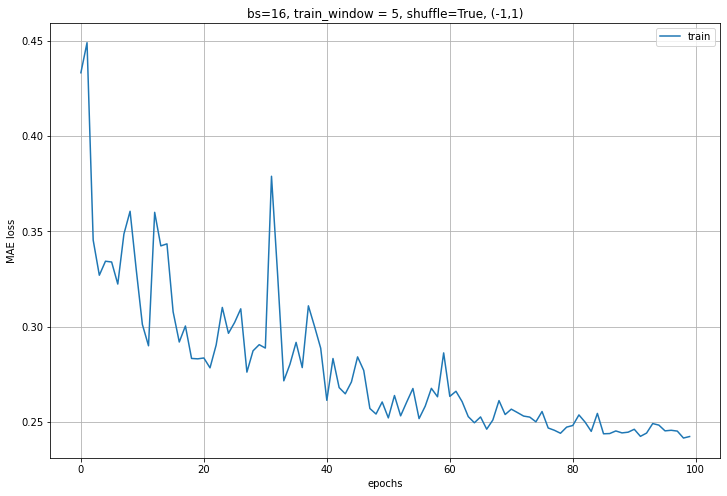

In [ ]:
plt.plot(train_cost, label = 'train')
plt.ylabel('MAE loss')
plt.xlabel('epochs')
#axes = plt.gca()
#axes.set_ylim([0,1])
plt.legend()
plt.title('bs=16, train_window = 5, shuffle=True, (-1,1)')
plt.grid()
plt.show()

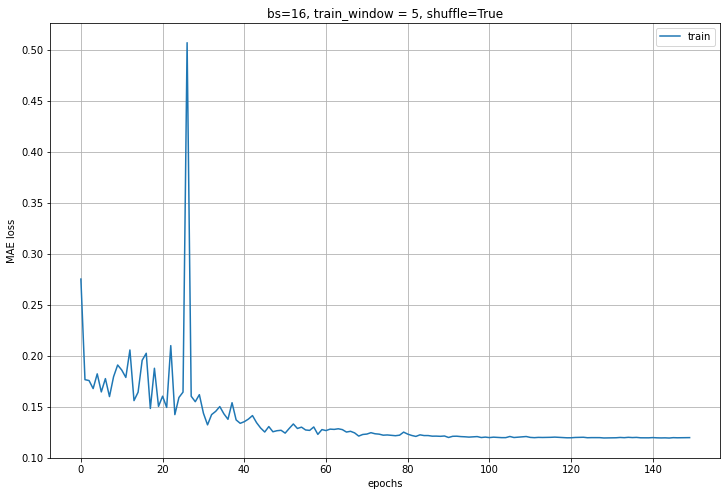

In [ ]:
plt.plot(train_cost, label = 'train')
plt.ylabel('MAE loss')
plt.xlabel('epochs')
#axes = plt.gca()
#axes.set_ylim([0,1])
plt.legend()
plt.title('bs=16, train_window = 5, shuffle=True')
plt.grid()
plt.show()

## eval

In [ ]:
fut_pred = 7

test_inputs = X_train_split[-1].squeeze().tolist()
if type(test_inputs) == float:
    test_inputs = [test_inputs]
test_inputs

[0.5427886648808685]

In [ ]:
model.eval()
loss_list = []

for i in range(len(X_test)):
    seq = torch.FloatTensor(test_inputs[-fut_pred:])
    #print(seq.shape)
    seq = seq.unsqueeze(0)
    #print(seq.shape)
    seq = seq.unsqueeze(2)
    #print(seq.shape)
    seq = seq.to(device)
    #print(seq.shape)
    #print(len(seq))
    #print('='*10)

    with torch.no_grad():
        model.hidden_cell = (torch.zeros(model.num_layers, len(seq), model.hidden_size).to(device),
                        torch.zeros(model.num_layers, len(seq), model.hidden_size).to(device))
        test_inputs.append(model(seq).squeeze().tolist())
        loss_list.append(criterion(model(seq).squeeze().cpu().detach(), torch.from_numpy(y_test_scaled[i]).squeeze()))

In [ ]:
print('sum loss:',np.sum(loss_list))
print('mean loss:',np.mean(loss_list))

sum loss: 157.48325
mean loss: 0.62001276


In [ ]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:]).reshape(-1, 1))
#actual_predictions = np.array(test_inputs[train_window:]).reshape(-1, 1)
actual_predictions[:5]

array([[4124.76551539],
       [4262.29872197],
       [4432.87712574],
       [4637.20117879],
       [4867.9172895 ]])

In [ ]:
torch.from_numpy(actual_predictions)[:10]

tensor([[4124.7655],
        [4262.2987],
        [4432.8771],
        [4637.2012],
        [4867.9173],
        [5093.7656],
        [5278.0713],
        [5408.8201],
        [5495.8254],
        [5549.8589]], dtype=torch.float64)

In [ ]:
torch.from_numpy(y_test.values).unsqueeze(1)[:10]

tensor([[4054.],
        [4037.],
        [3364.],
        [3678.],
        [4650.],
        [3179.],
        [2809.],
        [3328.],
        [3563.],
        [3497.]], dtype=torch.float64)

In [ ]:
criterion(torch.from_numpy(actual_predictions), torch.from_numpy(y_test.values).unsqueeze(1))

tensor(1697.4073, dtype=torch.float64)

In [ ]:
x = np.arange(len(data)-len(X_test), len(data), 1)

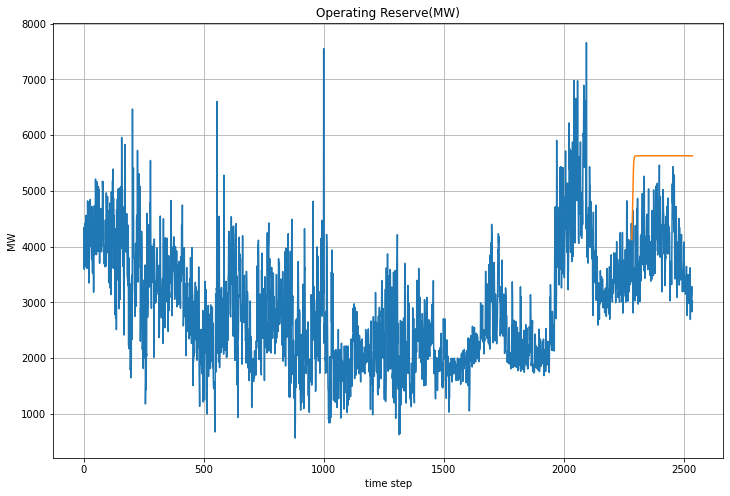

In [ ]:
plt.grid(True)
plt.title('Operating Reserve(MW)')
plt.plot(data, label='ground truth')
plt.plot(x,actual_predictions, label='predict')
plt.xlabel('time step')
plt.ylabel('MW')
plt.show()

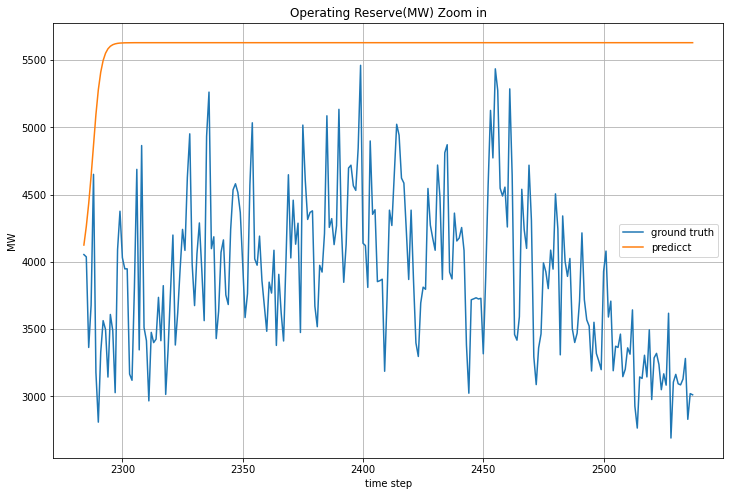

In [ ]:
plt.grid(True)
plt.title('Operating Reserve(MW) Zoom in')
plt.plot(data[-len(X_test):], label='ground truth')
plt.plot(x,actual_predictions, label='predicct')
plt.xlabel('time step')
plt.ylabel('MW')
plt.legend()
plt.show()